In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import unicodeit

Data Manager

In [58]:
data = pd.read_excel(r'C:\Users\Mehdi\Desktop\1.xlsx')

Scaling the data

In [59]:
scaler=RobustScaler()
std_data = scaler.fit(data.loc[:,'Pb':])
std_data = scaler.transform(data.loc[:,'Pb':])
std_data = pd.DataFrame(std_data, columns = data.columns[6:27])
std_data = pd.concat([data.loc[:,'form':'h'], std_data], axis=1)

Pearson

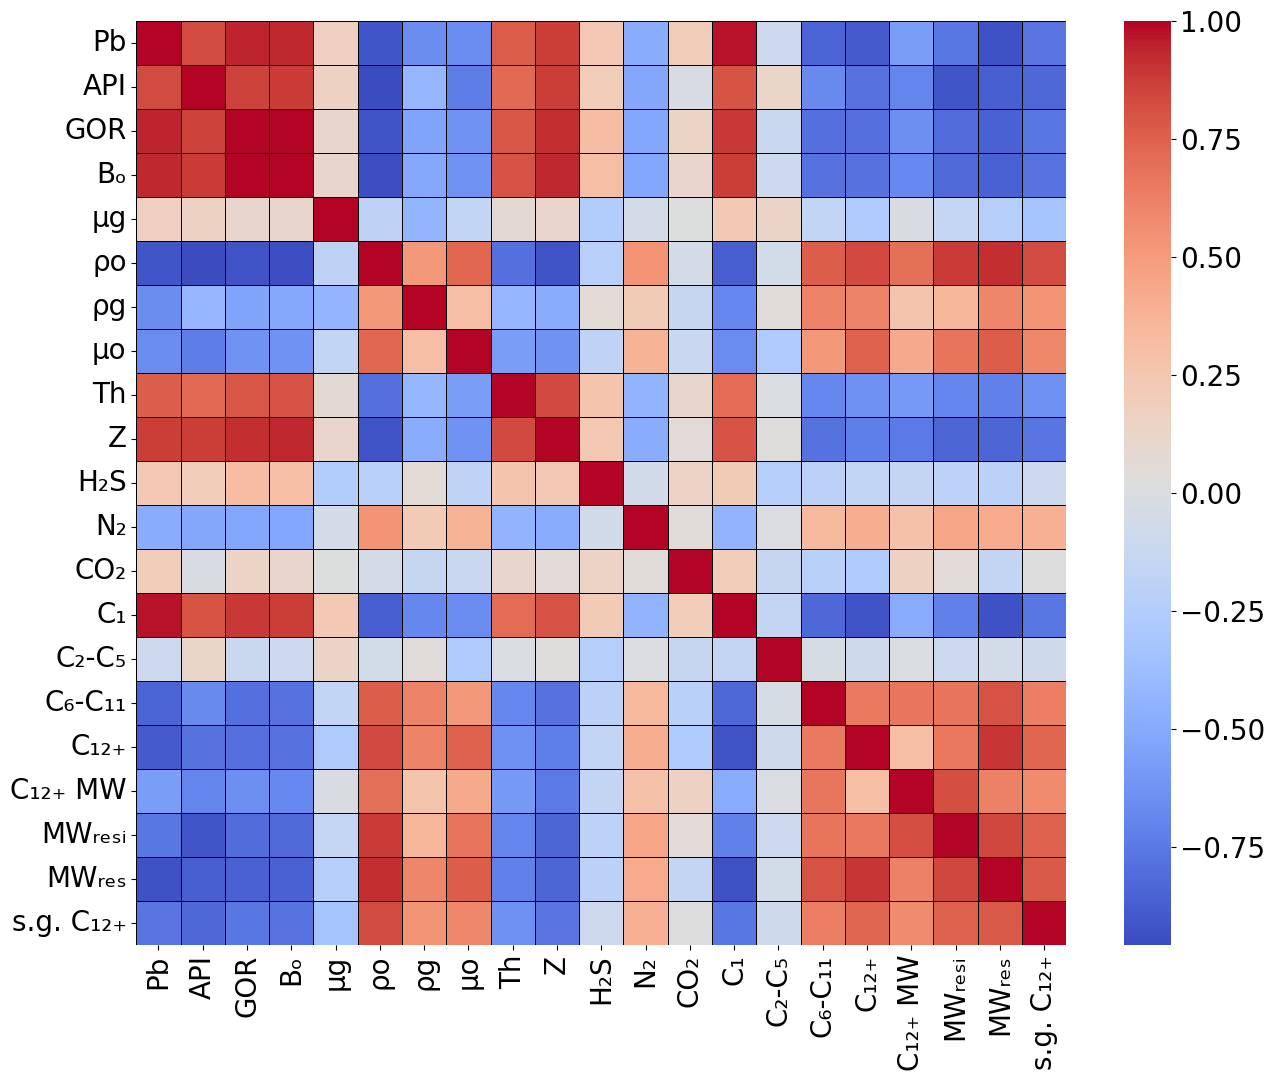

In [61]:
pearson = std_data.loc[:,'Pb':].corr()

fig=plt.figure(figsize=(15,12))
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)


a = ['Pb', 'API', 'GOR', 'Bₒ', 'μg', 'ρo','ρg', 'μo', 'Th', 'Z', 'H₂S', 'N₂', 'CO₂', 'C₁', 'C₂-C₅', 'C₆-C₁₁', 'C₁₂₊', 'C₁₂₊ MW', 'MWᵣₑₛᵢ', 'MWᵣₑₛ', 's.g. C₁₂₊' ]
sns.heatmap(std_data.loc[:,'Pb':].corr(), cmap='coolwarm', annot=False, linewidths=0.5, linecolor='black', xticklabels = a, yticklabels = a)

plt.savefig('Fig1.eps', bbox_inches = 'tight') 
plt.savefig('Fig1.png', dpi=600, bbox_inches = 'tight') 
plt.show()


Dropping some data based on what we learned from pearson

In [62]:
std_data.drop(labels=['GOR','Bo', 'API', 'Comp','C12+' ,'MW_Res'],axis= 1,inplace=True)
data.drop(labels=['GOR','Bo', 'API', 'Comp','C12+' ,'MW_Res'],axis= 1,inplace=True)

Separation of Data based on Formation

In [63]:
FAH_S = std_data[(std_data.form == "FAH")]
ILM_S = std_data[(std_data.form == "ILM")]
SAR_S = std_data[(std_data.form == "SAR")]
GAD_S = std_data[(std_data.form == "GAD")]
KZH_S = std_data[(std_data.form == "KZH")]
ASM_S = std_data[(std_data.form == "ASM")]

FAH = data[(data.form == "FAH")]
ILM = data[(data.form == "ILM")]
SAR = data[(data.form == "SAR")]
GAD = data[(data.form == "GAD")]
KZH = data[(data.form == "KZH")]
ASM = data[(data.form == "ASM")]



#sns.pairplot(FAH)
#plt.show()

In [64]:
pearson = SAR.corr()
print(pearson['x':'y'])

          x         y        Pb       Mug     Rho_o     Rho_g      Mu_o  \
x  1.000000 -0.672854  0.079540 -0.243601 -0.190351  0.242887  0.042896   
y -0.672854  1.000000  0.143134  0.193189  0.169129 -0.174710 -0.064735   

         Th       H2S        N2       CO2        C1     C2-C5    C6-C11  \
x  0.326335  0.090823 -0.192687  0.457011  0.025154 -0.172471 -0.121231   
y -0.346909  0.086218  0.119362 -0.127931  0.094050  0.043289  0.075909   

    MW_C12+   MW_Resi   SpGr12+  
x -0.003815 -0.050069  0.427625  
y  0.243471  0.314694 -0.147853  


C:\Users\Mehdi\AppData\Local\Temp\ipykernel_11280\925378031.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson = SAR.corr()


Plots based on location and depth

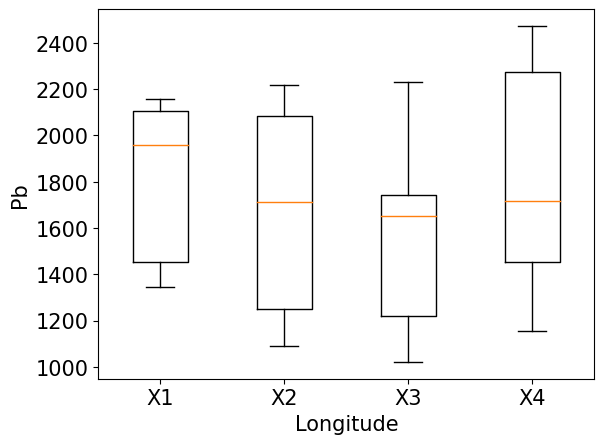

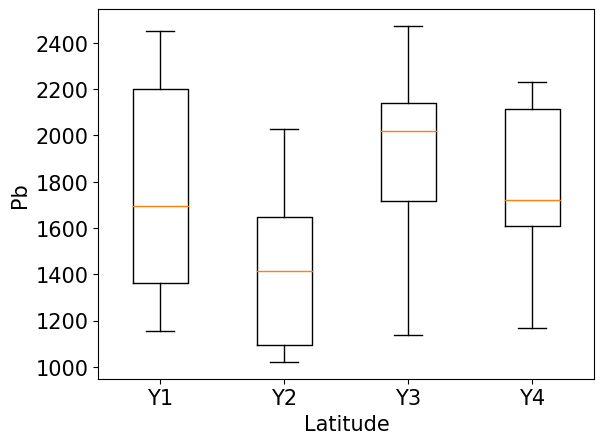

In [68]:
Dic = {'Pb':SAR.loc[:,'Pb'], 'X':SAR.loc[:,'x'], 'ind' : np.arange(SAR.loc[:,'Pb'].shape[0])}
Pb_X = pd.DataFrame(Dic)
Pb_X = Pb_X.sort_values(by=['X'])
X1 = Pb_X.iloc[0:14, 0]
X2 = Pb_X.iloc[14:28, 0]
X3 = Pb_X.iloc[28:42, 0]
X4 = Pb_X.iloc[42:55, 0]
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)
plt.boxplot([X1,X2,X3,X4], labels=['X1', 'X2', 'X3', 'X4'])
plt.xlabel('Longitude')
plt.ylabel('Pb')
plt.rc('axes', labelsize=15)
plt.savefig('Fig2A.eps', bbox_inches = 'tight') 
plt.savefig('Fig2A.png', dpi=600, bbox_inches = 'tight') 
plt.show()

Dic2 = {'Pb':SAR.loc[:,'Pb'], 'Y':SAR.loc[:,'y'], 'ind' : np.arange(SAR.loc[:,'Pb'].shape[0])}
Pb_Y = pd.DataFrame(Dic2)
Pb_Y = Pb_Y.sort_values(by=['Y'])
Y1 = Pb_Y.iloc[0:14, 0]
Y2 = Pb_Y.iloc[14:28, 0]
Y3 = Pb_Y.iloc[28:42, 0]
Y4 = Pb_Y.iloc[42:55, 0]
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)
plt.boxplot([Y1,Y2,Y3,Y4], labels=['Y1', 'Y2', 'Y3', 'Y4'])
plt.xlabel('Latitude')
plt.ylabel('Pb')
plt.rc('axes', labelsize=15)
plt.savefig('Fig2B.eps', bbox_inches = 'tight') 
plt.savefig('Fig2B.png', dpi=600, bbox_inches = 'tight') 
plt.show()

[ 0.29801735  0.45747283 -0.17636543 -0.01513035 -0.01516919  0.30059341
 -0.37082315 -0.03035256  0.31674582  0.34066178 -0.63400182  0.78154962
  0.47935103  0.42107536  0.46077505 -1.11015873 -0.76942872  0.13337064
 -0.19857434 -0.41456285 -0.78158295  0.14130435 -0.03555799  0.15247138
 -0.18967027  0.22849214 -0.55122549 -0.52514986 -0.60424503 -0.74488017
 -0.68624535 -0.74573185 -0.8935889  -0.78740157 -0.30426955 -0.1396348
  0.55512215  0.67096774]


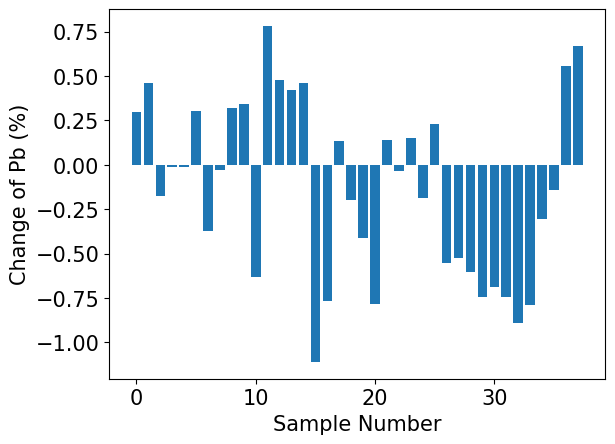

In [66]:
Pb_FAH_Depth_Corr = FAH.loc[0:142,'Pb']+FAH.loc[0:142,'h'].apply(lambda x: (4300 - x)*-0.13)
#Pb_FAH_Depth_Corr = pd.DataFrame(Pb_FAH_Depth_Corr)

Change_Percent = (Pb_FAH_Depth_Corr - FAH.loc[0:142,'Pb'])*100/FAH.loc[0:142,'Pb']
cpn = Change_Percent.to_numpy()
ind = np.arange(Change_Percent.shape[0])
print(cpn)
plt.bar(ind , cpn)
plt.xlabel('Sample Number')
plt.ylabel('Change of Pb (%)')
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('axes', labelsize=15)
plt.savefig('Fig3.eps', bbox_inches = 'tight') 
plt.savefig('Fig3.png', dpi=600, bbox_inches = 'tight') 
plt.show()

Isolation Forest


4     -0.118152
6     -0.135070
18     0.134758
20     0.016541
34     0.093576
35     0.057333
38     0.034511
39    -0.064321
40    -0.052381
41     0.102356
42     0.074721
43     0.083689
44     0.037692
46     0.101996
47     0.140327
48     0.085057
53     0.106958
60     0.094038
61     0.119436
65     0.090221
66     0.105273
71     0.130765
73     0.088232
74     0.090552
77     0.107443
78     0.110262
79     0.081502
80     0.100912
81     0.115429
82     0.018800
83     0.097116
84     0.046805
85     0.035007
88     0.138114
89     0.148486
90     0.036602
91     0.111103
92     0.072010
95     0.015613
96     0.051126
97     0.067694
98     0.037698
101    0.109019
102    0.124219
105    0.039773
106   -0.024454
107   -0.031278
113    0.069100
115    0.052408
117    0.086634
118    0.089453
124    0.002664
126    0.087189
129    0.068282
131    0.101957
Name: Scores, dtype: float64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


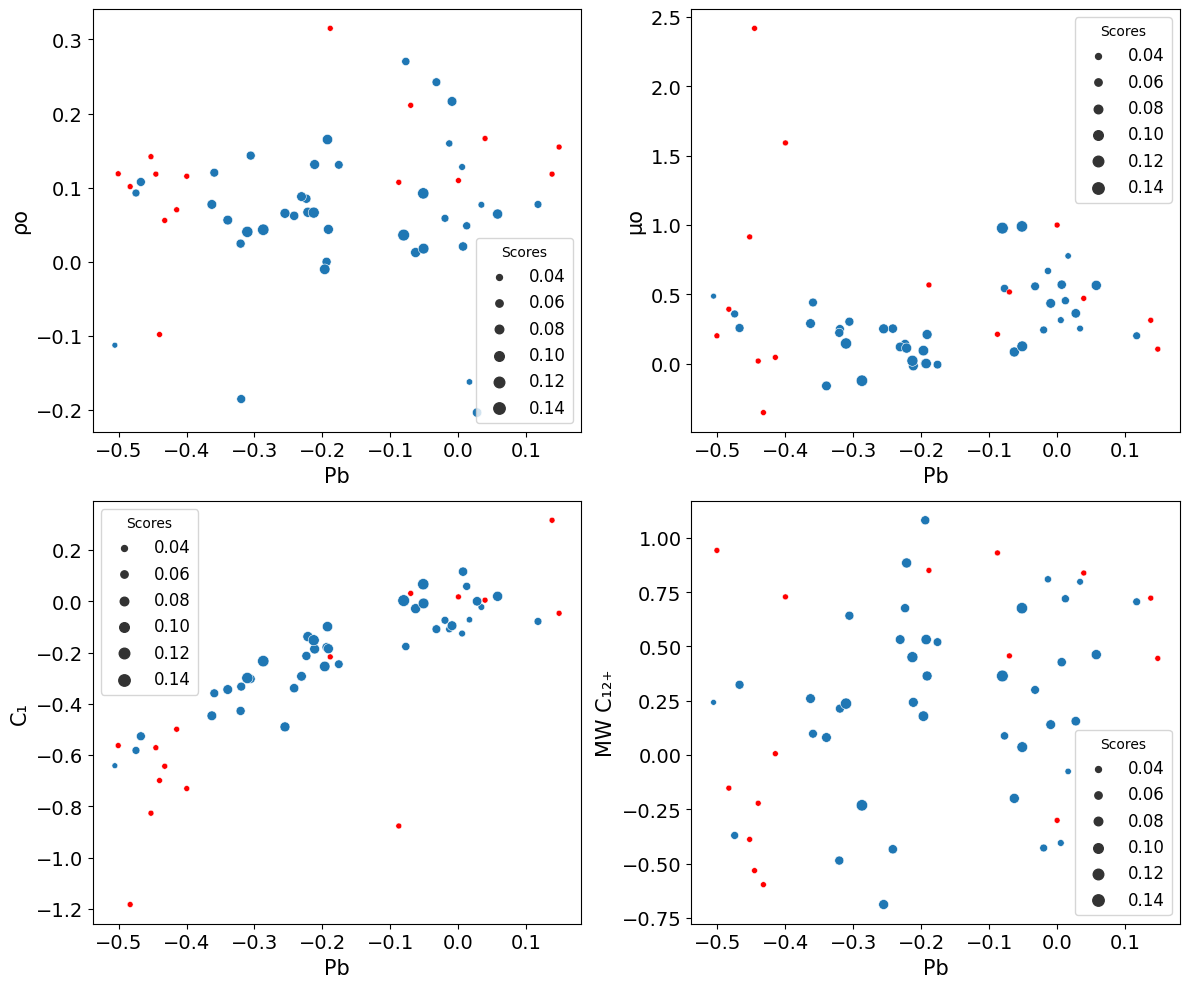

In [85]:
def IsolationForest(Data, n_est):
    from sklearn.ensemble import IsolationForest
    #Contamination is the percentage of outlier
    clf = IsolationForest(n_estimators = n_est)
    clf.fit(Data)
    Data['Scores'] = clf.decision_function(Data)
    print(Data['Scores'])    
    Data_Sorted = Data.sort_values(by=['Scores'])
    plt.figure(figsize = (12, 10))
    plt.title('Isolation Forest Method -- B Reservoir')
    ax1 = plt.subplot(2,2,1)
    sns.scatterplot(data=Data_Sorted[15:], x='Pb', y="Rho_o", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Rho_o", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('ρo')

    ax2 = plt.subplot(2,2,2)
    sns.scatterplot(data=Data_Sorted[15:], x='Pb', y="Mu_o", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Mu_o", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('μo')

    ax3 = plt.subplot(2,2,3)
    sns.scatterplot(data=Data_Sorted[15:], x='Pb', y="C1", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="C1", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('C₁')
    
    ax4 = plt.subplot(2,2,4)
    sns.scatterplot(data=Data_Sorted[15:], x='Pb', y="MW_C12+", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="MW_C12+", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('MW C₁₂₊')
    
    plt.rc('xtick', labelsize = 14)
    plt.rc('ytick', labelsize = 14)
    plt.rc('axes', labelsize=15)
    plt.rc('legend', fontsize=12)  
    plt.tight_layout()  
    plt.savefig('Fig.5.eps', bbox_inches = 'tight') 
    plt.savefig('Fig.5.png', dpi=600, bbox_inches = 'tight')  
    return


#FAH1 = FAH_S.loc[0:142,'Pb':]
#ILM1 = ILM_S.loc[0:142,'Pb':]
SAR1 = SAR_S.loc[0:142,'Pb':]
#GAD1 = GAD_S.loc[0:142,'Pb':]
#KZH1 = KZH_S.loc[0:142,'Pb':]

#IsolationForest(COMP1, 10)
#IS = IsolationForest(FAH1, 10)
#IL = IsolationForest(ILM1, 10)
IsolationForest(SAR1, 10)
#IsolationForest(GAD1, 10)
#IsolationForest(KZH1, 10)



DBSCAN

Finding optimum epsilon

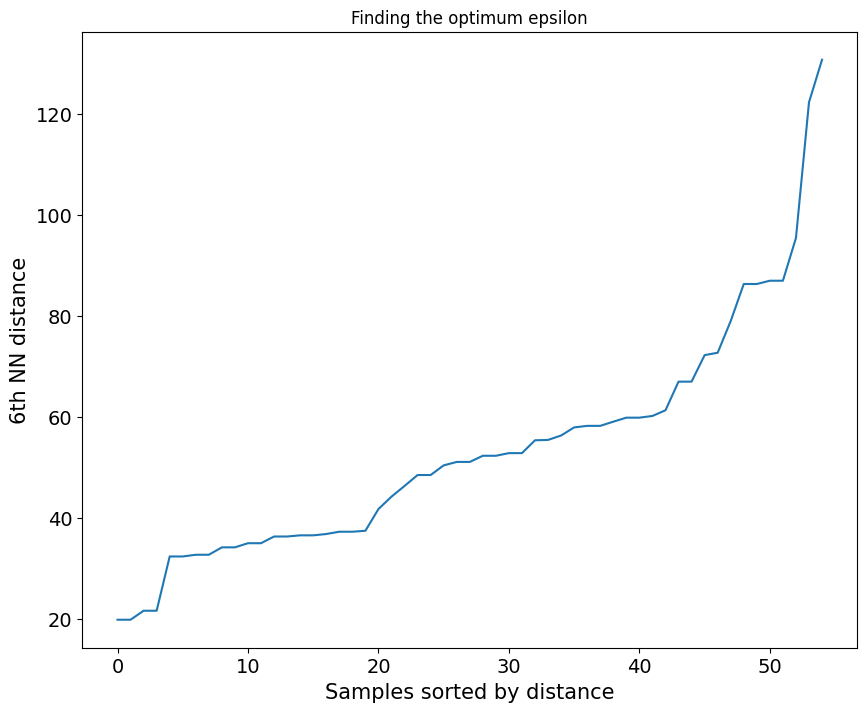

In [70]:
def OptimumEpsilonFinder (Data, n_nei):
    from sklearn.neighbors import NearestNeighbors
    Neighbors=NearestNeighbors(n_neighbors=n_nei)
    nbrs=Neighbors.fit(Data)
    distances, indices = nbrs.kneighbors(Data)
    fig=plt.figure(figsize=(10,8))
    distances=np.sort(distances, axis=0)
    distances=distances[:,1]
    plt.plot(distances)
    plt.title('Finding the optimum epsilon')
    plt.xlabel('Samples sorted by distance')
    plt.ylabel('6th NN distance')
    plt.show()
    return
OptimumEpsilonFinder (SAR.loc[0:142,'Pb':], 2)

DBSCAN Itself

4     -1
6     -1
18     0
20    -1
34     0
35    -1
38     0
39    -1
40    -1
41     0
42    -1
43     0
44     0
46     0
47     0
48     0
53     0
60     0
61     0
65     0
66     0
71     0
73     0
74     0
77     0
78     0
79     0
80     0
81     0
82    -1
83     0
84     0
85    -1
88     0
89     0
90     0
91     0
92     0
95    -1
96    -1
97    -1
98    -1
101    0
102    0
105    0
106   -1
107   -1
113    0
115    0
117    0
118    0
124    0
126    0
129    0
131    0
Name: clusters, dtype: int64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


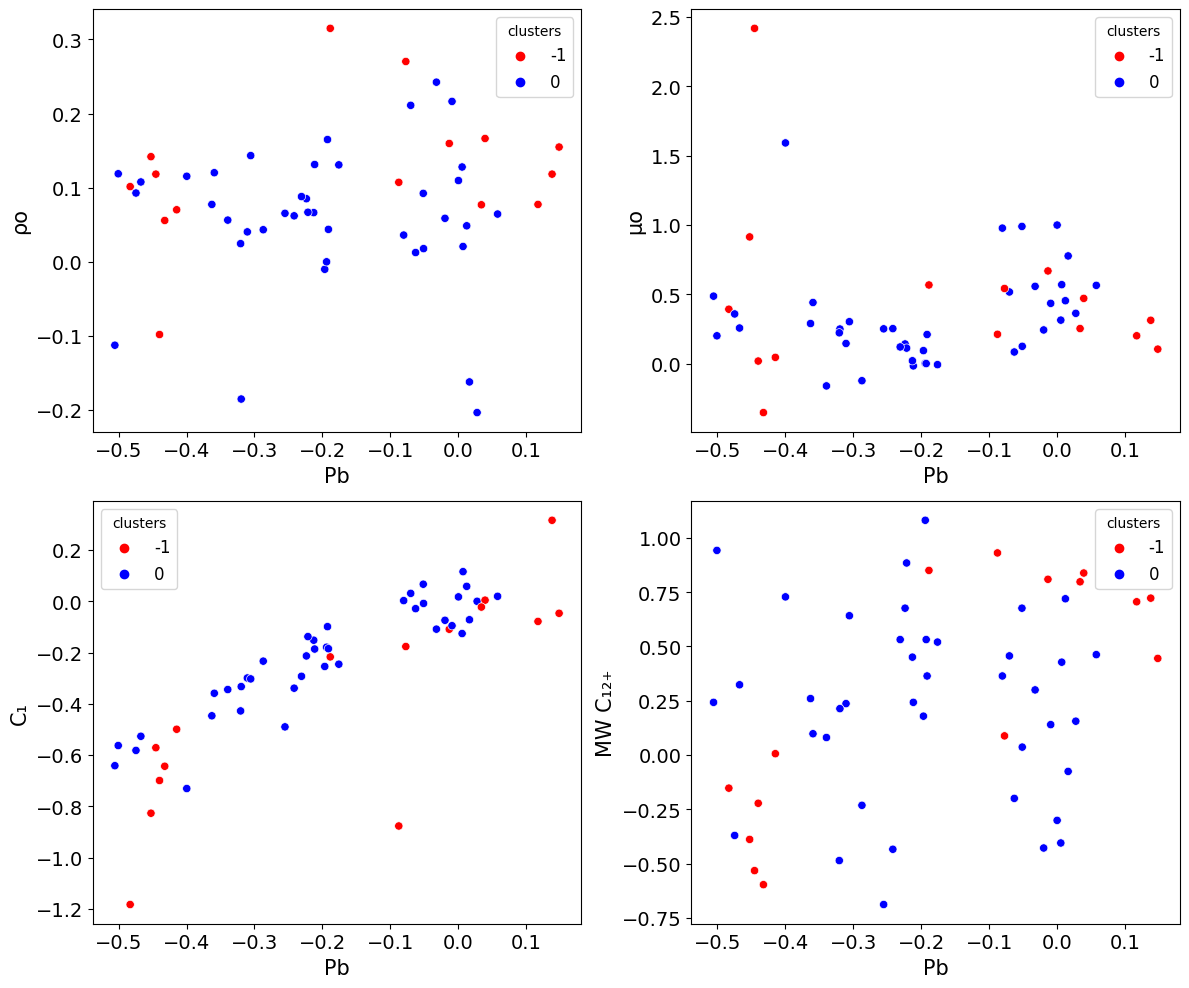

In [86]:

FAH2 = FAH_S.loc[0:142,'Pb':]
ILM2 = ILM_S.loc[0:142,'Pb':]
SAR2 = SAR_S.loc[0:142,'Pb':]
GAD2 = GAD_S.loc[0:142,'Pb':]
KZH2 = KZH_S.loc[0:142,'Pb':]

def DBSCANN(Data, eps, min_sam):
    from sklearn.cluster import DBSCAN
    Clustering=DBSCAN(eps=eps ,min_samples=min_sam, metric='euclidean')
    DB=Clustering.fit_predict(Data)
    labels=pd.DataFrame(DB,columns=['clusters'])
    #FAH=pd.DataFrame(FAH,columns=data.columns[:])
    Data['clusters']=DB
    print(Data['clusters'])
    #data['clusters']=DB
    Group_by_mean=Data.groupby(by='clusters').mean()
    #print(Group_by_mean)
   

    plt.figure(figsize = (12, 10))
    ax1 = plt.subplot(2,2,1)
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", hue = 'clusters', palette=['red', 'blue'])
    plt.xlabel('Pb')
    plt.ylabel('ρo')


    ax2 = plt.subplot(2,2,2)
    sns.scatterplot(data=Data, x='Pb', y="Mu_o", hue = 'clusters', palette=['red', 'blue'])
    plt.xlabel('Pb')
    plt.ylabel('μo')

    ax3 = plt.subplot(2,2,3)
    sns.scatterplot(data=Data, x='Pb', y="C1", hue = 'clusters', palette=['red', 'blue'])
    plt.xlabel('Pb')
    plt.ylabel('C₁')
    
    ax4 = plt.subplot(2,2,4)
    sns.scatterplot(data=Data, x='Pb', y="MW_C12+", hue = 'clusters', palette=['red', 'blue'])
    plt.xlabel('Pb')
    plt.ylabel('MW C₁₂₊')
    plt.rc('xtick', labelsize = 14)
    plt.rc('ytick', labelsize = 14)
    plt.rc('axes', labelsize=15)
    plt.rc('legend', fontsize=12)  
    plt.tight_layout()  
    plt.savefig('Fig.4.eps', bbox_inches = 'tight') 
    plt.savefig('Fig.4.png', dpi=600, bbox_inches = 'tight') 

    #sns.pairplot(FAH, hue = 'clusters')
    #plt.show()
    return

#DBSCANN(FAH2, 2, 6)
#DBSCANN(ILM2, 2, 6)
DBSCANN(SAR2, 2, 6)
#DBSCANN(GAD2, 2, 6)
#DBSCANN(KZH2, 2, 6)



LOF

4     -3.666049
6     -4.584194
18    -0.984155
20    -1.154771
34    -1.114304
35    -1.554117
38    -1.047283
39    -1.805804
40    -1.501163
41    -0.986917
42    -1.054910
43    -0.958256
44    -1.005036
46    -0.996218
47    -0.996347
48    -1.035897
53    -0.971346
60    -0.966832
61    -0.981221
65    -1.100214
66    -1.039270
71    -0.981402
73    -1.021017
74    -1.015685
77    -1.217909
78    -1.002744
79    -1.156902
80    -1.415641
81    -0.991237
82    -1.075333
83    -0.973693
84    -1.006052
85    -1.176036
88    -0.965731
89    -1.006901
90    -1.107710
91    -1.067654
92    -0.980018
95    -1.403267
96    -1.670737
97    -2.156567
98    -1.748988
101   -0.979685
102   -0.977046
105   -0.977577
106   -1.200231
107   -1.805299
113   -1.134133
115   -1.064132
117   -0.977322
118   -1.039539
124   -1.080222
126   -0.999440
129   -1.007047
131   -0.995745
Name: Scores, dtype: float64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


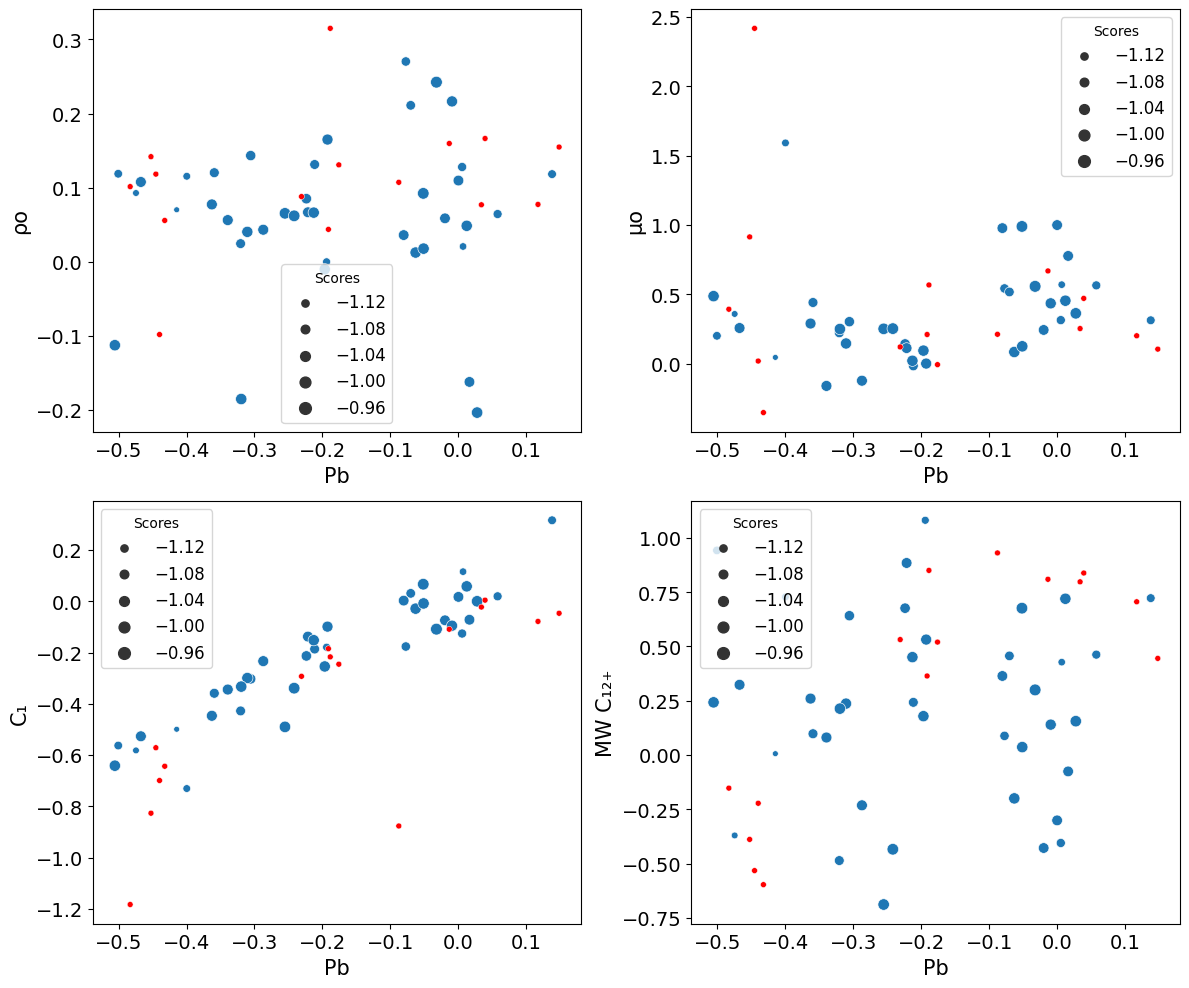

In [87]:
FAH3 = FAH_S.loc[0:142,'Pb':]
ILM3 = ILM_S.loc[0:142,'Pb':]
SAR3 = SAR_S.loc[0:142,'Pb':]
GAD3 = GAD_S.loc[0:142,'Pb':]
KZH3 = KZH_S.loc[0:142,'Pb':]
def LOF(Data, n_nei, con):
    from sklearn.neighbors import LocalOutlierFactor
    clf=LocalOutlierFactor(n_neighbors=n_nei, contamination=con,
                           metric='euclidean')
    hh= clf.fit(Data)
    Data['Scores']=clf.negative_outlier_factor_
    print(Data['Scores'])
    
    Data_Sorted = Data.sort_values(by=['Scores'])
    plt.figure(figsize = (12, 10))
    ax1 = plt.subplot(2,2,1)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="Rho_o", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Rho_o", c = 'red', size = 1, legend=False)
    plt.xlabel('Pb')
    plt.ylabel('ρo')

    ax2 = plt.subplot(2,2,2)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="Mu_o", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Mu_o", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('μo')

    ax3 = plt.subplot(2,2,3)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="C1", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="C1", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('C₁')
    
    ax4 = plt.subplot(2,2,4)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="MW_C12+", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="MW_C12+", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('MW C₁₂₊')
    plt.rc('xtick', labelsize = 14)
    plt.rc('ytick', labelsize = 14)
    plt.rc('axes', labelsize=15)
    plt.rc('legend', fontsize=12)      
    plt.tight_layout()  
    plt.savefig('Fig.7.eps', bbox_inches = 'tight') 
    plt.savefig('Fig.7.png', dpi=600, bbox_inches = 'tight') 
    
    return
#LOF(FAH3, 20, 'auto')
#LOF(ILM3, 20, 'auto')
LOF(SAR3, 20, 'auto')
#LOF(GAD3, 20, 'auto')
#LOF(KZH3, 20, 'auto')

OCSVM

4       1.248645
6       1.222343
18     12.041543
20     10.067929
34      9.377763
35      6.305417
38     10.149801
39      4.825719
40      7.025791
41     12.008001
42     10.587479
43     11.095748
44     10.659483
46     11.459885
47     11.210691
48     10.881250
53     12.294296
60     12.626794
61     12.863388
65     11.287421
66     11.710154
71     12.867404
73     11.936679
74     12.624304
77     10.274564
78     12.052000
79     10.881122
80      8.210964
81     11.777699
82     10.764991
83     12.216740
84     10.983971
85     10.185490
88     12.427033
89     12.293819
90     10.822690
91     11.204239
92     11.632375
95      8.692164
96      6.530945
97      3.835571
98      6.115238
101    10.847969
102    10.881122
105    12.791367
106     8.374393
107     5.064903
113     9.880225
115    10.753632
117    12.820746
118    10.881114
124    10.530616
126    10.881344
129    11.100932
131    11.285528
Name: Scores, dtype: float64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


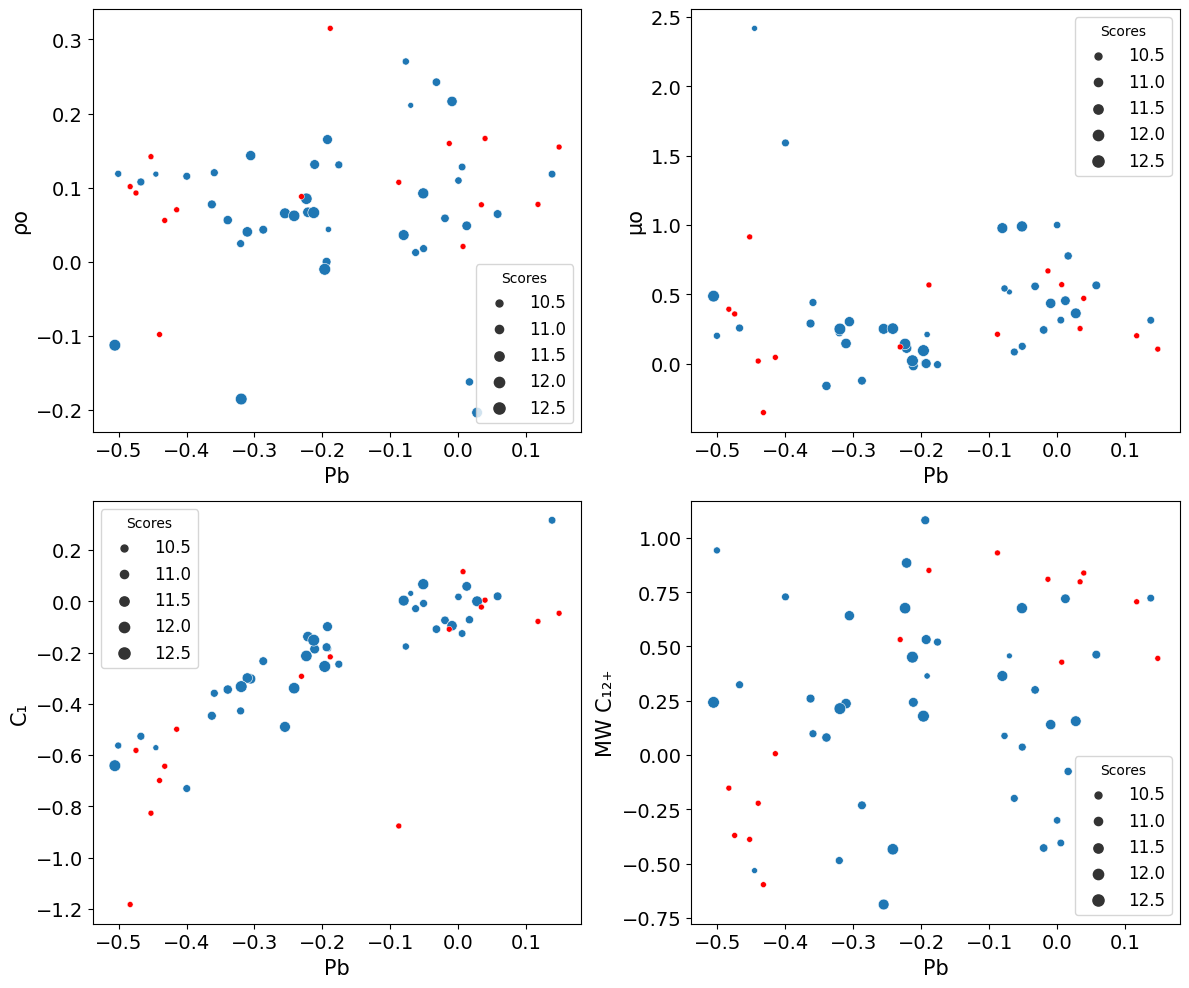

In [88]:
FAH4 = FAH_S.loc[0:142,'Pb':]
ILM4 = ILM_S.loc[0:142,'Pb':]
SAR4 = SAR_S.loc[0:142,'Pb':]
GAD4 = GAD_S.loc[0:142,'Pb':]
KZH4 = KZH_S.loc[0:142,'Pb':]
def OCSVM(Data, gamma):
    from sklearn.svm import OneClassSVM
    clf = OneClassSVM(gamma=gamma).fit(Data)
    clf.predict(Data)
    Data['Scores']=clf.score_samples(Data)
    print(Data['Scores'])

    
    Data_Sorted = Data.sort_values(by=['Scores'])
    plt.figure(figsize = (12, 10))
    ax1 = plt.subplot(2,2,1)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="Rho_o", size =  'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Rho_o", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('ρo')


    ax2 = plt.subplot(2,2,2)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="Mu_o", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Mu_o", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('μo')

    ax3 = plt.subplot(2,2,3)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="C1", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="C1", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('C₁')
    
    ax4 = plt.subplot(2,2,4)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="MW_C12+", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="MW_C12+", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('MW C₁₂₊')
    plt.rc('xtick', labelsize = 14)
    plt.rc('ytick', labelsize = 14)
    plt.rc('axes', labelsize=15)
    plt.rc('legend', fontsize=12)      
    plt.tight_layout()  
    plt.savefig('Fig.6.eps', bbox_inches = 'tight') 
    plt.savefig('Fig.6.png', dpi=600, bbox_inches = 'tight') 
    return

#OCSVM(FAH4, 'auto')
#OCSVM(ILM4, 'auto')
OCSVM(SAR4, 'auto')
#OCSVM(GAD4, 'auto')
#OCSVM(KZH4, 'auto')

ABOD

4      0.000056
6      0.000004
18     0.016541
20     0.000900
34     0.001581
35     0.000133
38     0.003260
39     0.000061
40     0.001148
41     0.032611
42     0.002713
43     0.006934
44     0.006789
46     0.026250
47     0.020197
48     0.005084
53     0.013128
60     0.021102
61     0.031389
65     0.018392
66     0.015883
71     0.045961
73     0.021600
74     0.023323
77     0.017886
78     0.022312
79     0.025801
80     0.009274
81     0.007297
82     0.002015
83     0.042886
84     0.016962
85     0.001159
88     0.015525
89     0.027680
90     0.002843
91     0.005790
92     0.010955
95     0.015357
96     0.007148
97     0.000723
98     0.005025
101    0.007973
102    0.008661
105    0.020942
106    0.000969
107    0.000040
113    0.001292
115    0.002911
117    0.045920
118    0.005558
124    0.002392
126    0.008155
129    0.012909
131    0.009152
Name: Scores, dtype: float64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


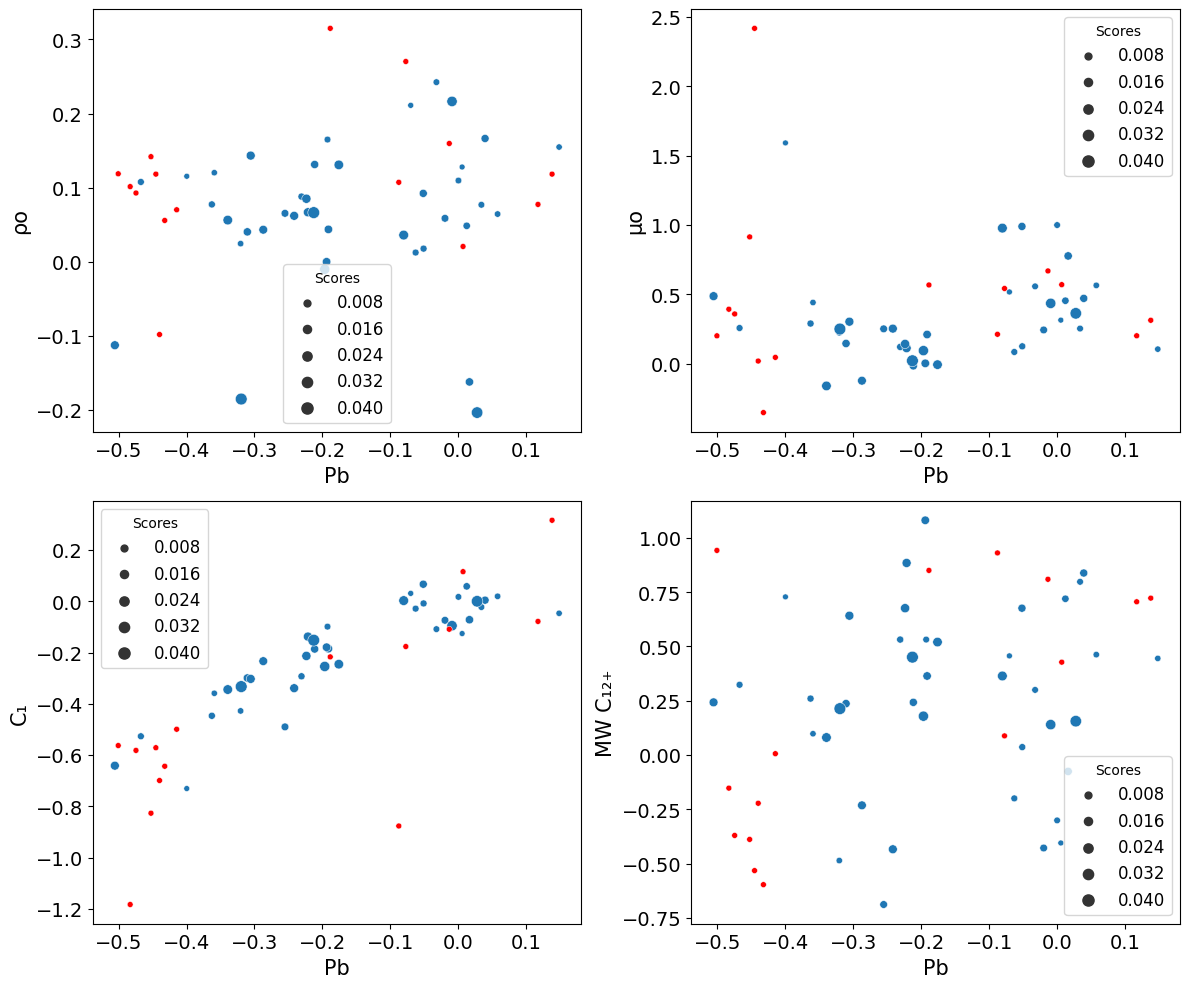

In [89]:
from pyod.models.abod import ABOD

FAH5 = FAH_S.loc[0:142,'Pb':]
ILM5 = ILM_S.loc[0:142,'Pb':]
SAR5 = SAR_S.loc[0:142,'Pb':]
GAD5 = GAD_S.loc[0:142,'Pb':]
KZH5 = KZH_S.loc[0:142,'Pb':]

def ABODme(Data, cont, n_neigh):
    abod_model = ABOD(contamination=cont, method='fast', n_neighbors=n_neigh)
    abod_model.fit(Data)
    Data['Scores'] = - abod_model.decision_scores_
    print(Data['Scores'])
    
    Data_Sorted = Data.sort_values(by=['Scores'])
    plt.figure(figsize = (12, 10))
    ax1 = plt.subplot(2,2,1)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="Rho_o", size =  'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Rho_o", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('ρo')


    ax2 = plt.subplot(2,2,2)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="Mu_o", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Mu_o", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('μo')

    ax3 = plt.subplot(2,2,3)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="C1", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="C1", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('C₁')
    
    ax4 = plt.subplot(2,2,4)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="MW_C12+", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="MW_C12+", c = 'red', legend=False, size = 1)
    plt.xlabel('Pb')
    plt.ylabel('MW C₁₂₊')
    plt.rc('xtick', labelsize = 14)
    plt.rc('ytick', labelsize = 14)
    plt.rc('axes', labelsize=15)
    plt.rc('legend', fontsize=12)  
    plt.tight_layout()  
    
    plt.savefig('Fig.8.eps', bbox_inches = 'tight') 
    plt.savefig('Fig.8.png', dpi=600, bbox_inches = 'tight') 
    return


#ABODme(FAH5, 0.1, 10)
#ABODme(ILM5, 0.1, 10)
ABODme(SAR5, 0.1, 10)
#ABODme(GAD5, 0.1, 10)
#ABODme(KZH5, 0.1, 10)